In [99]:
import numpy
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plts
import colorsys
from matplotlib.patches import Rectangle
import matplotlib.transforms
from PIL import Image


import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

In [100]:
def func(x, K, N0, r, x0 ):
    return (N0 + (K - N0) / (1 +  np.exp(- r * (x - x0)) ))

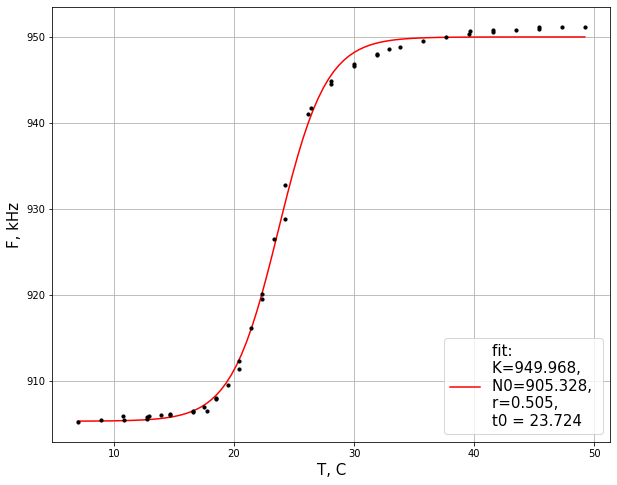

In [140]:
fig,ax=plt.subplots( figsize=(10,8)) 


out = pd.read_csv("9.csv", decimal=",") 
out.sort_values(["x"], axis = 0, inplace = True)
out.plot(ax = ax,kind = "scatter",  x = 'x', y = 'y', color = "black", s = 10, zorder = 10, label = None)


xdata = out["x"]
ydata = out["y"]
xdata_2 = np.linspace(min(xdata), max(xdata), 100)


t0 = 25
r0 = 1
p0 = [950, 900, r0 , t0]
popt, _ = curve_fit(func, xdata, ydata, p0 = p0)

plt.plot(xdata_2, func(xdata_2, *popt), 'r-',
     label='fit: \nK=%5.3f, \nN0=%5.3f, \nr=%5.3f, \nt0 = %5.3f' % tuple(popt))


plt.legend(fontsize = 15, loc = 4)

plt.ylabel(r"F, kHz",size=15)
plt.xlabel(r"T, C",size=15)
# ax.set_title("Поглотитель - ", fontsize = 15)
plt.grid()
# print((popt[2])/ popt[1] * 100, popt[4],popt[4]* 23.8/3, 2.355 * popt[3] , 2.355 * popt[3]* 23.8/3 )

# y = func(xdata, *popt)
# print(chisquare(ydata, f_exp = y))
    
fig.savefig("graph9.png")

In [102]:
def linear(x, k, b):
    return k * x + b

42.22 59
297.36663767186315
[  16.72793922 -405.09444307]


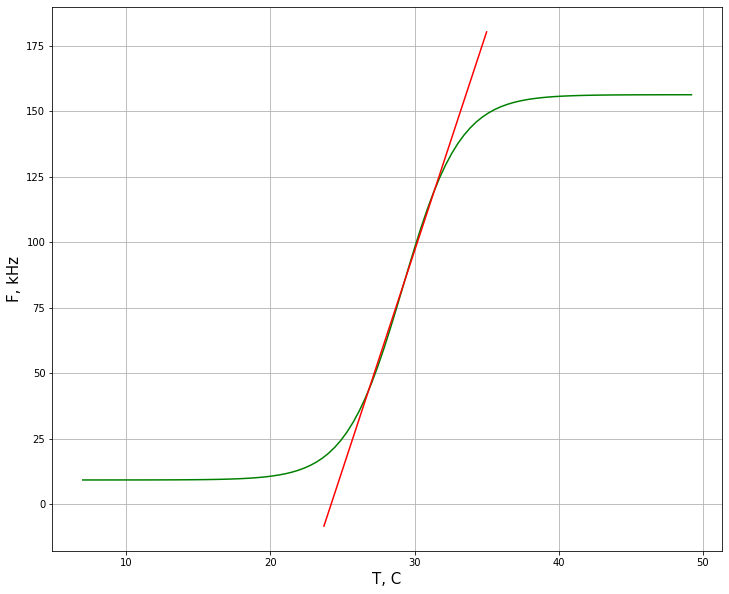

In [145]:
fig,ax=plt.subplots( figsize=(12,10))

y = 953

plt.plot(xdata_2,  func(xdata_2, *popt) ** 2 / (y ** 2  - func(xdata_2, *popt) ** 2) , 'g-')

n0 = int((26.0 - min(xdata))  / (max(xdata) - min(xdata))  * 100)
n1 = int((32.0 - min(xdata))  / (max(xdata) - min(xdata))  * 100)
print(max(xdata) - min(xdata),  n1)
xdata_lim = xdata_2[n0:n1]
ydata_lim = func(xdata_lim, *popt) ** 2 / (y ** 2  - func(xdata_lim, *popt) ** 2)

p0 = [16,-405]
popt2, _ = curve_fit(linear, xdata_lim, ydata_lim, p0 = p0)

xdata_nice = np.linspace(-popt2[1]/ popt2[0]  - 0.5, 35, 10)
plt.plot(xdata_nice, linear(xdata_nice, *popt2), 'r-')

print(-popt2[1]/ popt2[0] + 273.15)
print(popt2)
plt.ylabel(r"F, kHz",size=15)
plt.xlabel(r"T, C",size=15)
# ax.set_title("Поглотитель - ", fontsize = 15)
plt.grid()
# print((popt[2])/ popt[1] * 100, popt[4],popt[4]* 23.8/3, 2.355 * popt[3] , 2.355 * popt[3]* 23.8/3 )

# y = func(xdata, *popt)
# print(chisquare(ydata, f_exp = y))
    

In [149]:
293.4-273.15

20.25